<a href="https://colab.research.google.com/github/Gauranga2022/Time-Series-analysis/blob/main/GARCH_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 9.2 MB/s eta 0:00:00


In [3]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# GARCH(2,2) Model

$$
a_t = \varepsilon_t \sqrt{\omega + \alpha_1 a_{t-1}^2 + \alpha_2 a_{t-2}^2 + \beta_1 \sigma_{t-1}^2 + \beta_2 \sigma_{t-2}^2}
$$

$$
a_0, a_1 \sim \mathcal{N}(0,1)
$$

$$
\sigma_0 =1, \sigma_1 = 1
$$

$$
\varepsilon_t \sim \mathcal{N}(0,1)
$$

In [4]:
# create dataset
n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

test_size = int(n*0.1)

series = [gauss(0,1), gauss(0,1)]
vols = [1, 1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 + beta_1*vols[-1]**2 + beta_2*vols[-2]**2)
    new_val = gauss(0,1) * new_vol

    vols.append(new_vol)
    series.append(new_val)

In [20]:
type(vols), type(series)

(list, list)

Text(0.5, 1.0, 'Simulated GARCH(2,2) Data')

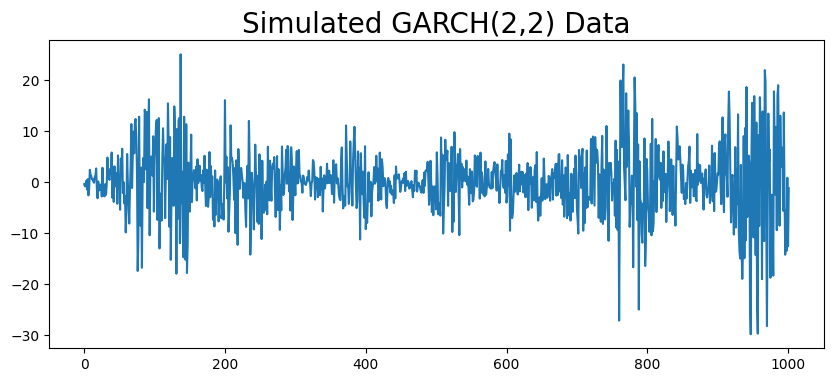

In [5]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated GARCH(2,2) Data', fontsize=20)

Text(0.5, 1.0, 'Data Volatility')

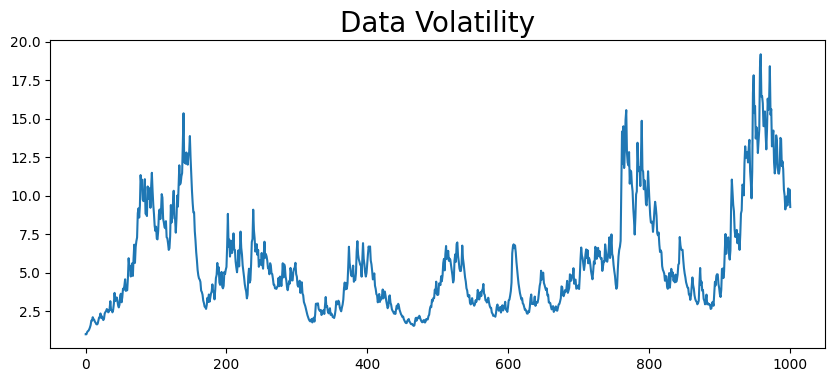

In [6]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volatility', fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

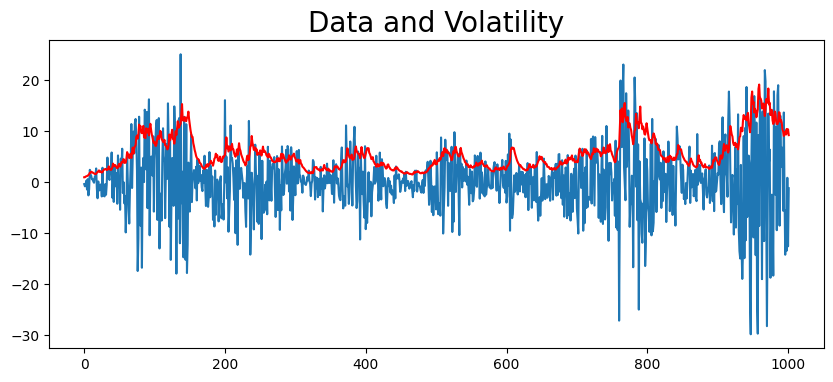

In [7]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Data and Volatility', fontsize=20)

# PACF Plot

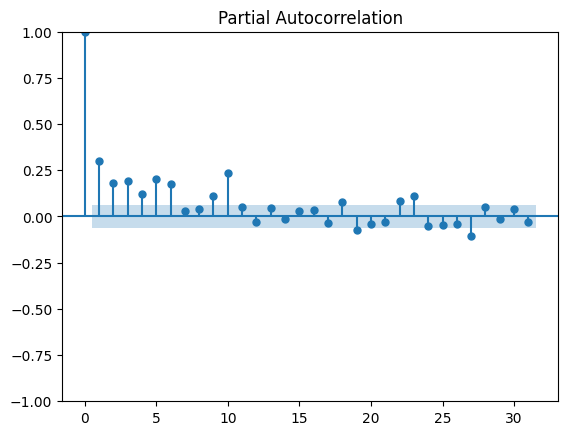

In [8]:
plot_pacf(np.array(series)**2)
plt.show()

# Fit the GARCH Model

In [9]:
train, test = series[:-test_size], series[-test_size:]

In [10]:
model = arch_model(train, p=2, q=2)

In [11]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 151995.57897703955
Iteration:      2,   Func. Count:     17,   Neg. LLF: 2069671.9394754008
Iteration:      3,   Func. Count:     25,   Neg. LLF: 3028.782267007361
Iteration:      4,   Func. Count:     34,   Neg. LLF: 2622.618211118536
Iteration:      5,   Func. Count:     42,   Neg. LLF: 2620.6132123208035
Iteration:      6,   Func. Count:     50,   Neg. LLF: 2616.795230155427
Iteration:      7,   Func. Count:     57,   Neg. LLF: 2619.0294232873457
Iteration:      8,   Func. Count:     65,   Neg. LLF: 2616.5702504447218
Iteration:      9,   Func. Count:     72,   Neg. LLF: 2616.5095176561463
Iteration:     10,   Func. Count:     79,   Neg. LLF: 2616.503202952085
Iteration:     11,   Func. Count:     86,   Neg. LLF: 2616.5019292913703
Iteration:     12,   Func. Count:     93,   Neg. LLF: 2616.501801132941
Iteration:     13,   Func. Count:    100,   Neg. LLF: 2616.5017920465993
Iteration:     14,   Func. Count:    106,   Neg. LLF: 26

In [12]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2616.50
Distribution:                  Normal   AIC:                           5245.00
Method:            Maximum Likelihood   BIC:                           5273.83
                                        No. Observations:                  902
Date:                Tue, Dec 05 2023   Df Residuals:                      901
Time:                        17:34:26   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0475      0.110      0.432      0.666 [ -0.168,  0.263]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.4212      0.200      2.106  3.523e-02  [2.915e-02,  0.813]
alpha[1]       0.0919  4.189e-02      2.193  2.828e-02  [9.780e-03,  0.174]
alpha[2]       0.1580  8.300e-02      1.903  5.698e-02 [-4.691e-03,  0.321]
beta[1]        0.7404      0.345      2.144  3.205e-02  [6.351e-02,  1.417]
beta[2]    9.6834e-03      0.279  3.465e-02      0.972    [ -0.538,  0.557]
===========================================================================

Covariance estimator: robust
"""

# Predict

In [13]:
predictions = model_fit.forecast(horizon=test_size)

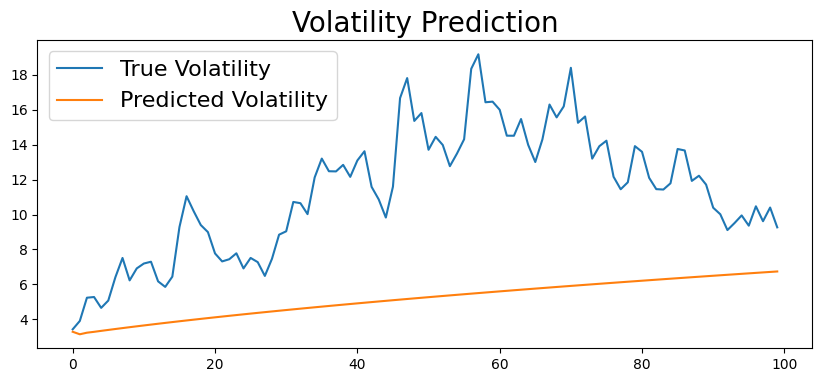

In [14]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

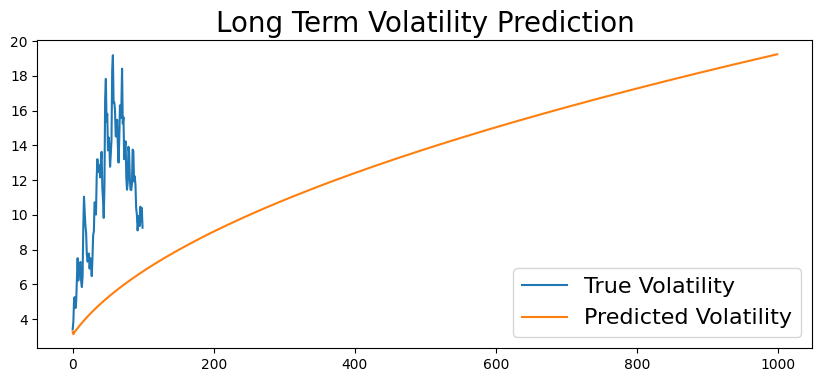

In [15]:
predictions_long_term = model_fit.forecast(horizon=1000)
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

# Rolling Forecast Origin

In [16]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

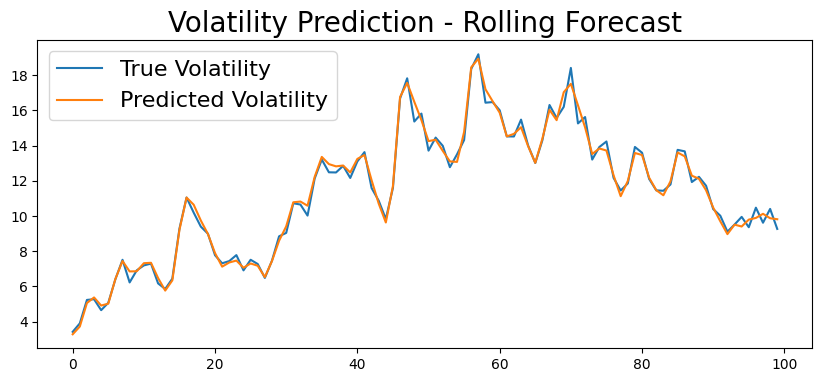

In [17]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)